In [1]:
import pandas as pd
import numpy as np
import torch

import sys
import os
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("__file__"))))
from cleaning.pipeline import strategic_fill, shift_forecast_columns

In [2]:
project_root = os.path.dirname(os.path.dirname(os.path.abspath("__file__")))
data_path = os.path.join(project_root, 'data', 'raw_data', 'ELIA.csv')
print(f"Trying to load from: {data_path}")
raw_data = pd.read_csv(data_path, sep=';')

raw_data['time'] = pd.to_datetime(raw_data['time'], utc=True)
raw_data.set_index('time', inplace=True)

Trying to load from: /Users/aryanahri/epf_datasets/data/raw_data/ELIA.csv


In [3]:
raw_data.head()

,Resolution code,Total Load,Most recent forecast,Most recent P10,Most recent P90,Day-ahead 6PM forecast,Day-ahead 6PM P10,Day-ahead 6PM P90,Week-ahead forecast
time,,,,,,,,,
2025-04-01 21:45:00+00:00,PT15M,NaN,9204.22,8642.31,9766.12,9204.22,8642.31,9766.12,9204.22
2025-04-01 21:30:00+00:00,PT15M,NaN,9260.33,8695.00,9825.66,9260.33,8695.00,9825.66,9260.33
2025-04-01 21:15:00+00:00,PT15M,NaN,9297.51,8729.91,9865.11,9297.51,8729.91,9865.11,9297.51
2025-04-01 21:00:00+00:00,PT15M,NaN,9322.65,8753.52,9891.79,9322.65,8753.52,9891.79,9322.65
2025-04-01 20:45:00+00:00,PT15M,NaN,9396.32,8839.93,9952.71,9396.32,8839.93,9952.71,9396.32


In [4]:
raw_data.tail()

,Resolution code,Total Load,Most recent forecast,Most recent P10,Most recent P90,Day-ahead 6PM forecast,Day-ahead 6PM P10,Day-ahead 6PM P90,Week-ahead forecast
time,,,,,,,,,
2015-01-01 00:00:00+00:00,PT15M,9755.00,9222.33,8880.23,9564.44,10130.36,9777.87,10482.86,9203.25
2014-12-31 23:45:00+00:00,PT15M,9821.78,9025.46,8432.07,9618.85,9216.09,8625.97,9806.20,9319.45
2014-12-31 23:30:00+00:00,PT15M,9952.87,9174.72,8571.51,9777.92,9367.66,8767.84,9967.47,9473.22
2014-12-31 23:15:00+00:00,PT15M,10051.28,9329.17,8715.80,9942.53,9526.54,8916.55,10136.53,9653.31
2014-12-31 23:00:00+00:00,PT15M,10142.19,9496.05,8871.71,10120.38,9697.59,9076.64,10318.53,9833.37


In [5]:
raw_data.sort_index()

,Resolution code,Total Load,Most recent forecast,Most recent P10,Most recent P90,Day-ahead 6PM forecast,Day-ahead 6PM P10,Day-ahead 6PM P90,Week-ahead forecast
time,,,,,,,,,
2014-12-31 23:00:00+00:00,PT15M,10142.19,9496.05,8871.71,10120.38,9697.59,9076.64,10318.53,9833.37
2014-12-31 23:15:00+00:00,PT15M,10051.28,9329.17,8715.80,9942.53,9526.54,8916.55,10136.53,9653.31
2014-12-31 23:30:00+00:00,PT15M,9952.87,9174.72,8571.51,9777.92,9367.66,8767.84,9967.47,9473.22
2014-12-31 23:45:00+00:00,PT15M,9821.78,9025.46,8432.07,9618.85,9216.09,8625.97,9806.20,9319.45
2015-01-01 00:00:00+00:00,PT15M,9755.00,9222.33,8880.23,9564.44,10130.36,9777.87,10482.86,9203.25
...,...,...,...,...,...,...,...,...,...
2025-04-01 20:45:00+00:00,PT15M,NaN,9396.32,8839.93,9952.71,9396.32,8839.93,9952.71,9396.32
2025-04-01 21:00:00+00:00,PT15M,NaN,9322.65,8753.52,9891.79,9322.65,8753.52,9891.79,9322.65
2025-04-01 21:15:00+00:00,PT15M,NaN,9297.51,8729.91,9865.11,9297.51,8729.91,9865.11,9297.51


In [6]:
start_time = raw_data.index.min()
end_time = raw_data.index.max()
complete_range = pd.date_range(start=start_time, end=end_time, freq='h')

# Find missing hours and then insert these times to make the time consecutive
missing_hours = complete_range.difference(raw_data.index)
print(missing_hours)
missing_df = pd.DataFrame(index=missing_hours)
raw_data = pd.concat([raw_data, missing_df])
raw_data = raw_data.sort_index()

filled_df = strategic_fill(raw_data)

DatetimeIndex([], dtype='datetime64[ns, UTC]', freq='h')


In [7]:
filled_df.tail()

,Resolution code,Total Load,Most recent forecast,Most recent P10,Most recent P90,Day-ahead 6PM forecast,Day-ahead 6PM P10,Day-ahead 6PM P90,Week-ahead forecast
time,,,,,,,,,
2025-04-01 20:45:00+00:00,PT15M,9374.35,9396.32,8839.93,9952.71,9396.32,8839.93,9952.71,9396.32
2025-04-01 21:00:00+00:00,PT15M,9286.44,9322.65,8753.52,9891.79,9322.65,8753.52,9891.79,9322.65
2025-04-01 21:15:00+00:00,PT15M,9242.07,9297.51,8729.91,9865.11,9297.51,8729.91,9865.11,9297.51
2025-04-01 21:30:00+00:00,PT15M,9199.90,9260.33,8695.00,9825.66,9260.33,8695.00,9825.66,9260.33
2025-04-01 21:45:00+00:00,PT15M,9101.31,9204.22,8642.31,9766.12,9204.22,8642.31,9766.12,9204.22


In [8]:

filled_df['DoW'] = filled_df.index.dayofweek  # Monday=0, Sunday=6
filled_df['HoD'] = filled_df.index.hour
filled_df['MoY'] = filled_df.index.month

filled_df[['DoW', 'HoD', 'MoY']].head()


,DoW,HoD,MoY
time,,,
2014-12-31 23:00:00+00:00,2,23,12
2014-12-31 23:15:00+00:00,2,23,12
2014-12-31 23:30:00+00:00,2,23,12
2014-12-31 23:45:00+00:00,2,23,12
2015-01-01 00:00:00+00:00,3,0,1


In [9]:
from matplotlib import pyplot as plt

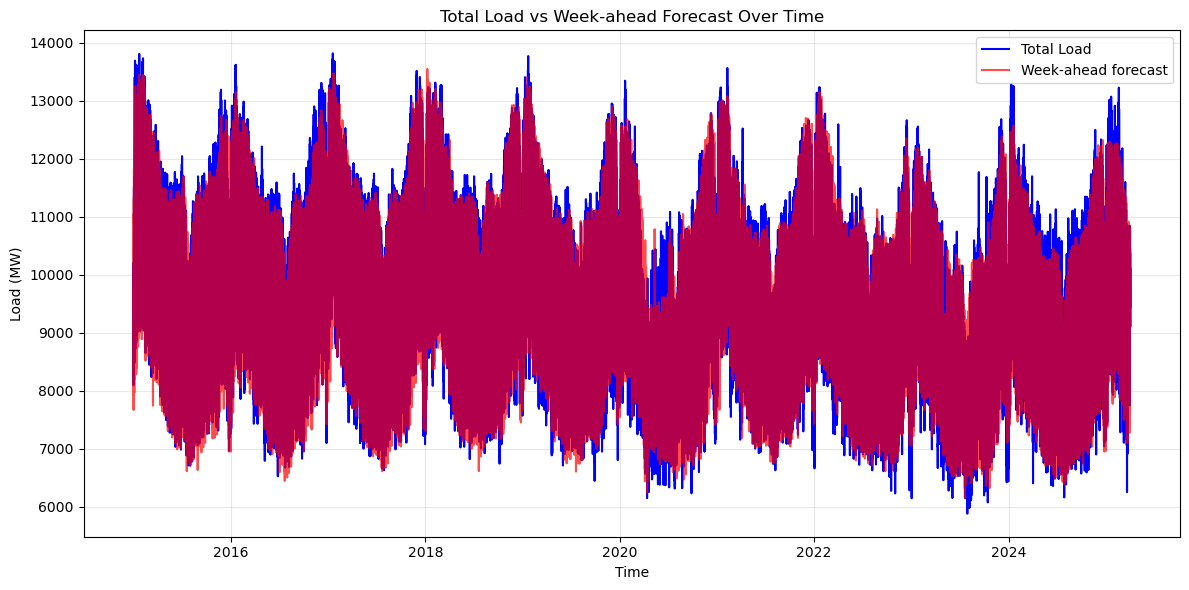

Mean Absolute Error between Total Load and Week-ahead forecast: 280.85 MW


In [10]:
# Create a plot of Total Load vs Week-ahead forecast across time
plt.figure(figsize=(12, 6))
plt.plot(filled_df.index, filled_df['Total Load'], label='Total Load', color='blue')
plt.plot(filled_df.index, filled_df['Week-ahead forecast'], label='Week-ahead forecast', color='red', alpha=0.7)
plt.title('Total Load vs Week-ahead Forecast Over Time')
plt.xlabel('Time')
plt.ylabel('Load (MW)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate and print the mean absolute error between actual load and forecast
mae = np.mean(np.abs(filled_df['Total Load'] - filled_df['Week-ahead forecast']))
print(f"Mean Absolute Error between Total Load and Week-ahead forecast: {mae:.2f} MW")


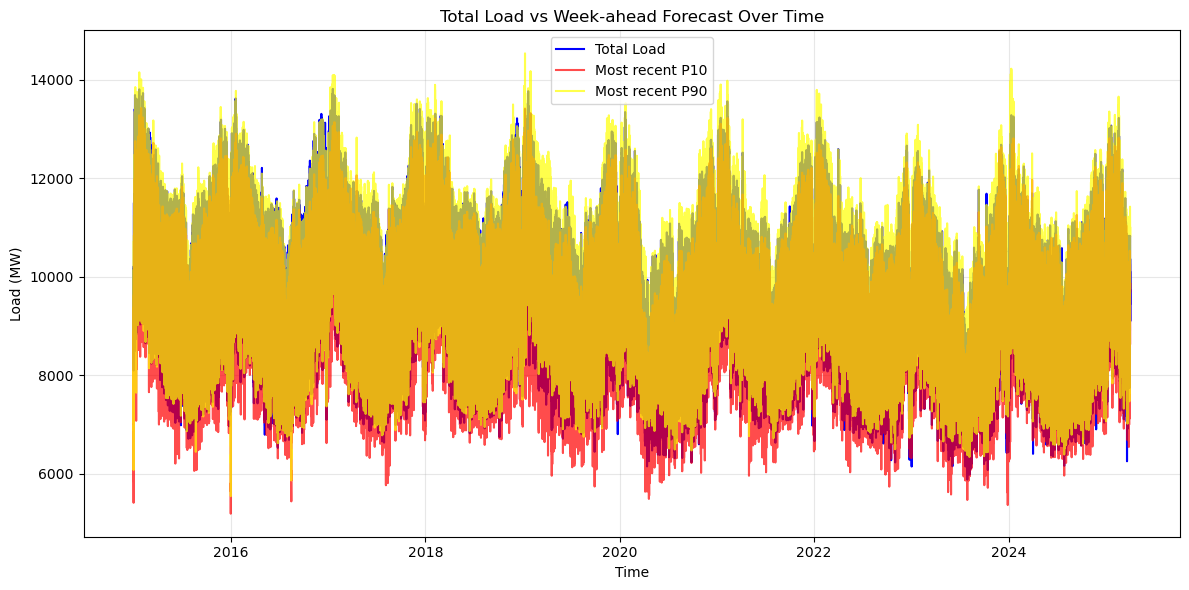

In [11]:
# Create a plot of Total Load vs Week-ahead forecast across time
plt.figure(figsize=(12, 6))
plt.plot(filled_df.index, filled_df['Total Load'], label='Total Load', color='blue')
plt.plot(filled_df.index, filled_df['Most recent P10'], label='Most recent P10', color='red', alpha=0.7)
plt.plot(filled_df.index, filled_df['Most recent P90'], label='Most recent P90', color='yellow', alpha=0.7)
plt.title('Total Load vs Week-ahead Forecast Over Time')
plt.xlabel('Time')
plt.ylabel('Load (MW)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


/var/folders/bz/8k18ft7x11n_w6ks_k5dq1gr0000gn/T/ipykernel_32070/2887578314.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_load = filled_df['Total Load'].resample('H').mean()


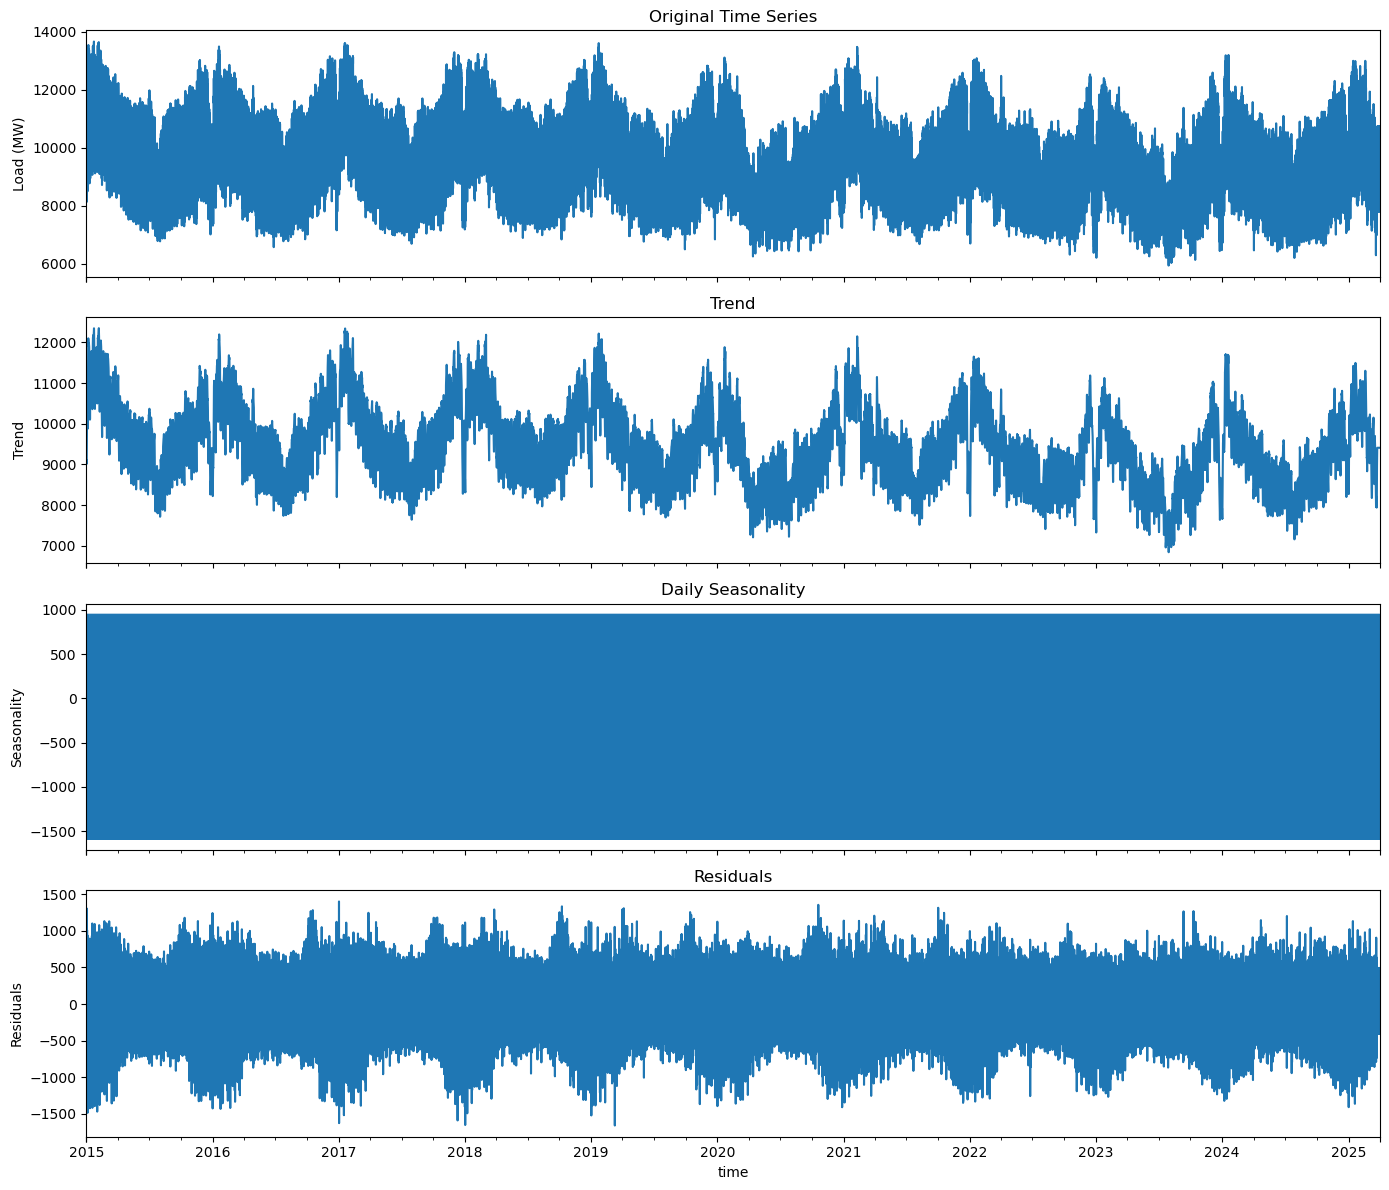

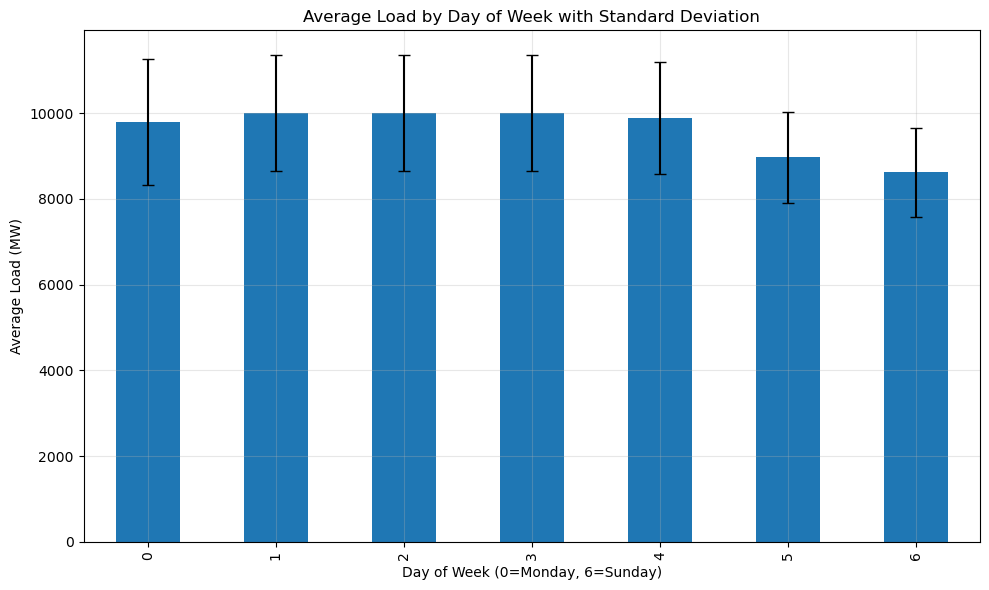

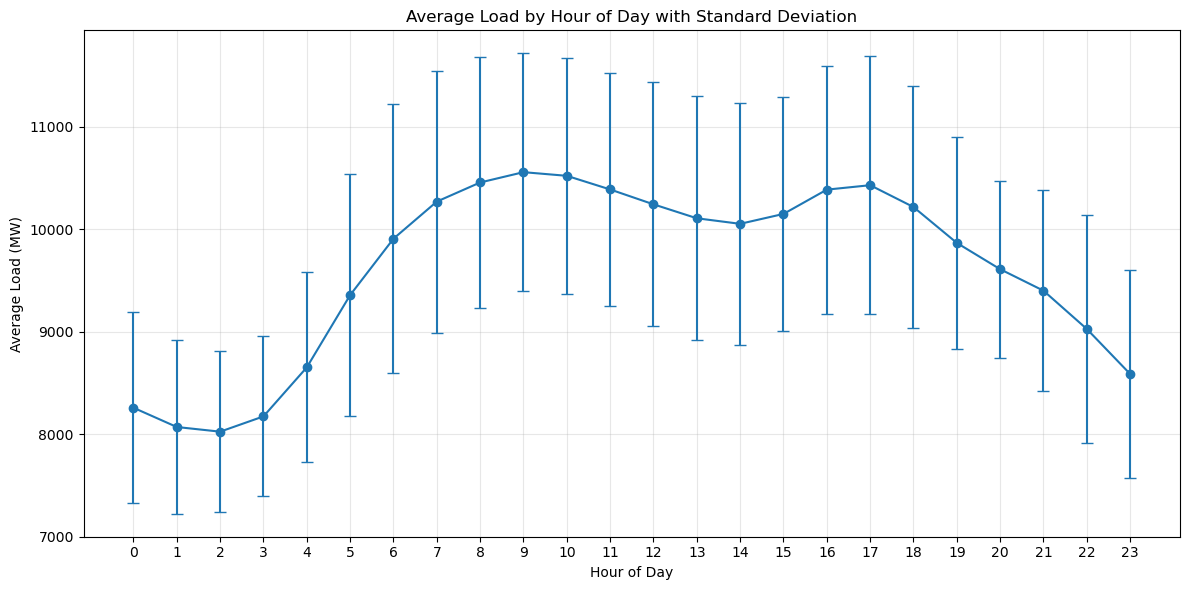

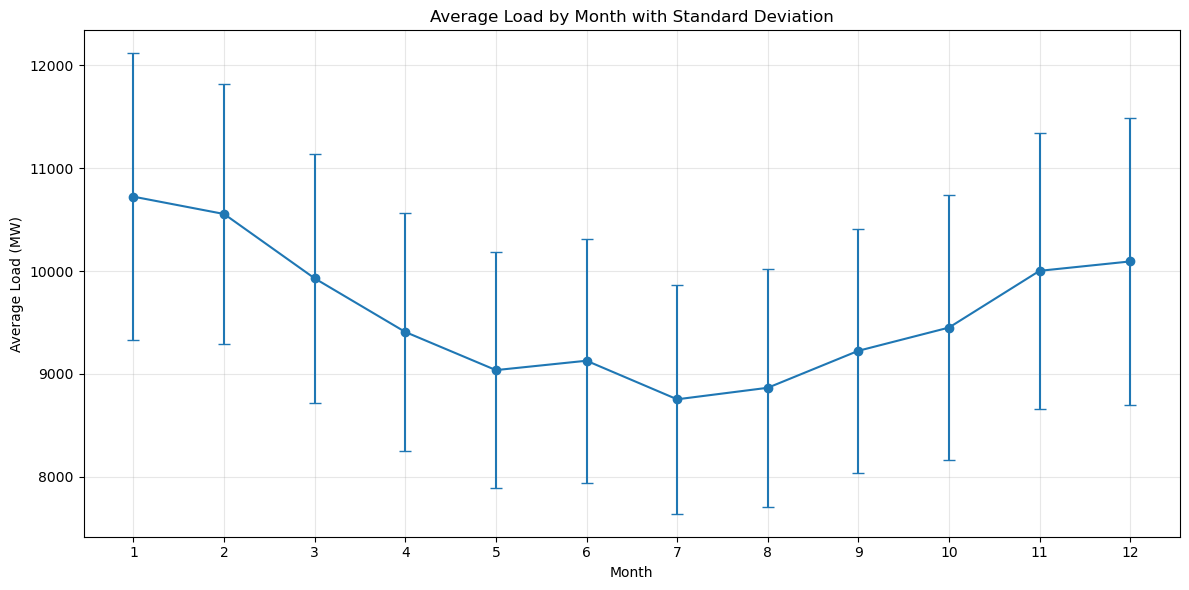

Correlation between Total Load and time features:
DoW: -0.2932
HoD: 0.2342
MoY: -0.1591


In [12]:
# Analyze seasonality patterns in the Total Load data
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np

# Resample to hourly data for clearer seasonal patterns
hourly_load = filled_df['Total Load'].resample('H').mean()

# Perform seasonal decomposition
# Using additive model for consistent seasonal variations
decomposition = seasonal_decompose(hourly_load, model='additive', period=24)

# Create a figure with subplots to visualize the decomposition
fig, axes = plt.subplots(4, 1, figsize=(14, 12), sharex=True)

# Plot original data
decomposition.observed.plot(ax=axes[0], title='Original Time Series')
axes[0].set_ylabel('Load (MW)')

# Plot trend component
decomposition.trend.plot(ax=axes[1], title='Trend')
axes[1].set_ylabel('Trend')

# Plot seasonal component
decomposition.seasonal.plot(ax=axes[2], title='Daily Seasonality')
axes[2].set_ylabel('Seasonality')

# Plot residual component
decomposition.resid.plot(ax=axes[3], title='Residuals')
axes[3].set_ylabel('Residuals')

plt.tight_layout()
plt.show()

# Analyze weekly patterns
weekly_avg = filled_df.groupby('DoW')['Total Load'].mean()
weekly_std = filled_df.groupby('DoW')['Total Load'].std()

fig, ax = plt.subplots(figsize=(10, 6))
weekly_avg.plot(kind='bar', yerr=weekly_std, ax=ax, capsize=4)
ax.set_title('Average Load by Day of Week with Standard Deviation')
ax.set_xlabel('Day of Week (0=Monday, 6=Sunday)')
ax.set_ylabel('Average Load (MW)')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Analyze hourly patterns
hourly_avg = filled_df.groupby('HoD')['Total Load'].mean()
hourly_std = filled_df.groupby('HoD')['Total Load'].std()

fig, ax = plt.subplots(figsize=(12, 6))
hourly_avg.plot(kind='line', yerr=hourly_std, ax=ax, capsize=4, marker='o')
ax.set_title('Average Load by Hour of Day with Standard Deviation')
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Average Load (MW)')
ax.set_xticks(range(0, 24))
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Analyze monthly patterns
monthly_avg = filled_df.groupby('MoY')['Total Load'].mean()
monthly_std = filled_df.groupby('MoY')['Total Load'].std()

fig, ax = plt.subplots(figsize=(12, 6))
monthly_avg.plot(kind='line', yerr=monthly_std, ax=ax, capsize=4, marker='o')
ax.set_title('Average Load by Month with Standard Deviation')
ax.set_xlabel('Month')
ax.set_ylabel('Average Load (MW)')
ax.set_xticks(range(1, 13))
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate correlation between load and time features
time_features = ['DoW', 'HoD', 'MoY']
correlations = {feature: filled_df['Total Load'].corr(filled_df[feature]) for feature in time_features}
print("Correlation between Total Load and time features:")
for feature, corr in correlations.items():
    print(f"{feature}: {corr:.4f}")



In [13]:
shifted_df = shift_forecast_columns(filled_df, ['Day-ahead 6PM forecast', 'Day-ahead 6PM P10', 'Day-ahead 6PM P90'], -24)
shifted_df = shift_forecast_columns(shifted_df, ['Week-ahead forecast'], -168)

In [14]:
shifted_df.head()

,Resolution code,Total Load,Most recent forecast,Most recent P10,Most recent P90,Day-ahead 6PM forecast,Day-ahead 6PM P10,Day-ahead 6PM P90,Week-ahead forecast,DoW,HoD,MoY
time,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,PT15M,10142.19,9496.05,8871.71,10120.38,8766.60,8422.14,9111.07,11825.52,2,23,12
2014-12-31 23:15:00+00:00,PT15M,10051.28,9329.17,8715.80,9942.53,8770.77,8426.22,9115.31,11793.00,2,23,12
2014-12-31 23:30:00+00:00,PT15M,9952.87,9174.72,8571.51,9777.92,8888.71,8539.53,9237.89,11701.51,2,23,12
2014-12-31 23:45:00+00:00,PT15M,9821.78,9025.46,8432.07,9618.85,8793.62,8445.70,9141.53,11597.23,2,23,12
2015-01-01 00:00:00+00:00,PT15M,9755.00,9222.33,8880.23,9564.44,8685.12,8338.97,9031.27,11479.82,3,0,1


In [15]:
output_path = '../data/cleaned/cleaned_elia_data.csv'
shifted_df.to_csv(output_path)
print(f"Cleaned data saved to {output_path}")

Cleaned data saved to ../data/cleaned/cleaned_elia_data.csv
